In [1]:
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
def im2double(im):                                          #定義im2double
    minval =np.min(im.ravel())                              #將影像打成一維陣列並取最小值          
    maxval =np.max(im.ravel())                              #將影像打成一維陣列並取最大值
    double = (im.astype("float")-minval)/(maxval-minval)    #將影像傳成float形式，同時與minval與maxval做計算
    return double     


In [3]:
cleara = cv.imread('images/5bg.jpg')
clearb = cv.imread('images/5fg.jpg')
fkame = cv.imread('images/5bg.jpg')
bkame = cv.imread('images/5fg.jpg')
# BGR to GRAY
fkame = cv.cvtColor(fkame, cv.COLOR_BGR2GRAY)
bkame = cv.cvtColor(bkame, cv.COLOR_BGR2GRAY)
# uin8 to double
fkame = im2double(fkame)                        
bkame = im2double(bkame)
# High-pass filter (Laplacian)
laplacian = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
fkame = abs(cv.filter2D(fkame,-1,laplacian))
bkame = abs(cv.filter2D(bkame,-1,laplacian))

True

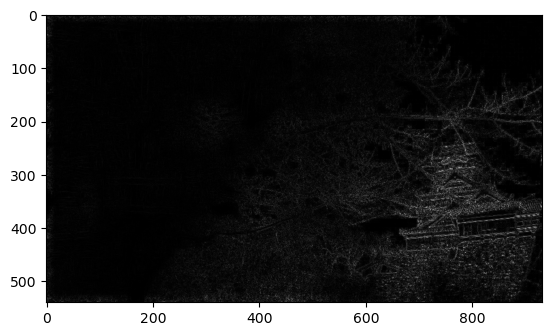

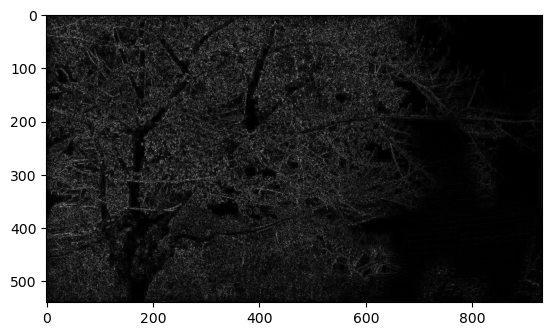

In [4]:
fig = plt.figure()
plt.imshow(fkame,"gray")
fig = plt.figure()
plt.imshow(bkame,"gray")


if not os.path.exists('images'):
    os.mkdir('images')
cv.imwrite('images/ex2.1.2-fg-HPF.jpg', (fkame*255).astype(np.uint8))

if not os.path.exists('images'):
    os.mkdir('images')
cv.imwrite('images/ex2.1.2-bg-HDF.jpg', (bkame*255).astype(np.uint8))

In [5]:
# mask = fg_HPL -  bg_HPL
mask = fkame - bkame
# Mean filter
img_blur = cv.blur(mask,(20,20))
# Binary
ret, out = cv.threshold(img_blur,0, 1, cv.THRESH_BINARY)
one = np.ones((fkame.shape[0],fkame.shape[1]))
output = out*(-1)+one 
# Binary-mask to Clear image
B, G, R = cv.split(cleara)
merged_imga = cv.merge([np.array(B*out, dtype=np.uint8), np.array(G*out, dtype=np.uint8),np.array(R*out, dtype=np.uint8)])
b, g, r = cv.split(clearb)
merged_imgab = cv.merge([np.array(b*output, dtype=np.uint8), np.array(g*output, dtype=np.uint8),np.array(r*output, dtype=np.uint8)])
# fg+bg
img = merged_imga+merged_imgab

True

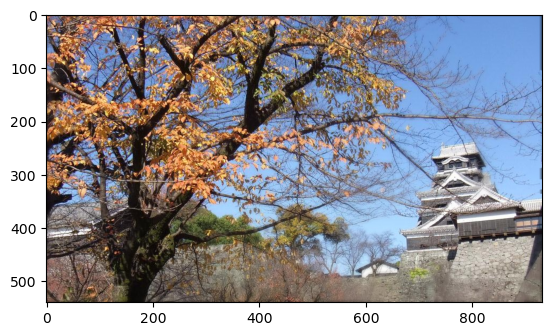

In [6]:
fig = plt.figure()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

if not os.path.exists('images'):
    os.mkdir('images')
cv.imwrite('images/ex2.1.2.jpg', img)